In [1]:
2+5

7

In [8]:
import os

# Check what you have
BASE_DIR = "smartvision_dataset"

print("="*70)
print("🔍 DIAGNOSING YOUR DATASET STRUCTURE")
print("="*70)

if not os.path.exists(BASE_DIR):
    print(f"\n❌ '{BASE_DIR}' folder does NOT exist!")
    print(f"📍 Current location: {os.getcwd()}")
    print(f"\n💡 Create the folder or navigate to correct directory")
else:
    print(f"\n✅ Found '{BASE_DIR}' folder")
    print(f"📍 Location: {os.path.abspath(BASE_DIR)}")
    print(f"\n📂 Contents:")
    
    items = os.listdir(BASE_DIR)
    if not items:
        print("   (empty)")
    else:
        for item in items:
            item_path = os.path.join(BASE_DIR, item)
            if os.path.isdir(item_path):
                print(f"   📁 {item}/")
                # Check subfolders
                try:
                    sub_items = os.listdir(item_path)[:3]
                    for sub in sub_items:
                        print(f"      └─ {sub}")
                    if len(os.listdir(item_path)) > 3:
                        print(f"      └─ ... ({len(os.listdir(item_path)) - 3} more)")
                except:
                    pass
            else:
                print(f"   📄 {item}")

print("\n" + "="*70)

🔍 DIAGNOSING YOUR DATASET STRUCTURE

✅ Found 'smartvision_dataset' folder
📍 Location: c:\project\SmartVision AI Project\eda_analysis\smartvision_dataset

📂 Contents:
   📄 dataset_metadata.json



In [10]:
import shutil
import os

# Source (where your data is)
source = r"C:\project\SmartVision AI Project\data\smartvision_dataset"

# Destination (where script looks)
destination = "smartvision_dataset"

# Copy the entire folder
if os.path.exists(source):
    print(f"📁 Copying dataset from:\n   {source}")
    print(f"📁 To:\n   {os.path.abspath(destination)}")
    
    if os.path.exists(destination):
        print("⚠️  Destination already exists, will merge...")
    
    shutil.copytree(source, destination, dirs_exist_ok=True)
    print("✅ Copy complete!")
else:
    print(f"❌ Source not found: {source}")

📁 Copying dataset from:
   C:\project\SmartVision AI Project\data\smartvision_dataset
📁 To:
   c:\project\SmartVision AI Project\eda_analysis\smartvision_dataset
⚠️  Destination already exists, will merge...
✅ Copy complete!


✅ Found dataset at: C:\project\SmartVision AI Project\data\smartvision_dataset
📁 Structure: smartvision_dataset/classification/train/
🏷️  Detected 26 classes: airplane, bed, bench, bicycle, bird...

📊 SMARTVISION AI - EXPLORATORY DATA ANALYSIS
✅ Found splits: train, val, test

🔍 Scanning for images...

✅ Found 2600 total images
   Train: 1820
   Val: 390
   Test: 390
   Classes: 26

📈 CLASS DISTRIBUTION

        Class  Train  Val  Test  Total
     airplane     70   15    15    100
          bed     70   15    15    100
        bench     70   15    15    100
      bicycle     70   15    15    100
         bird     70   15    15    100
       bottle     70   15    15    100
         bowl     70   15    15    100
          bus     70   15    15    100
         cake     70   15    15    100
          car     70   15    15    100
          cat     70   15    15    100
        chair     70   15    15    100
        couch     70   15    15    100
          cow     70   15    15    100
       

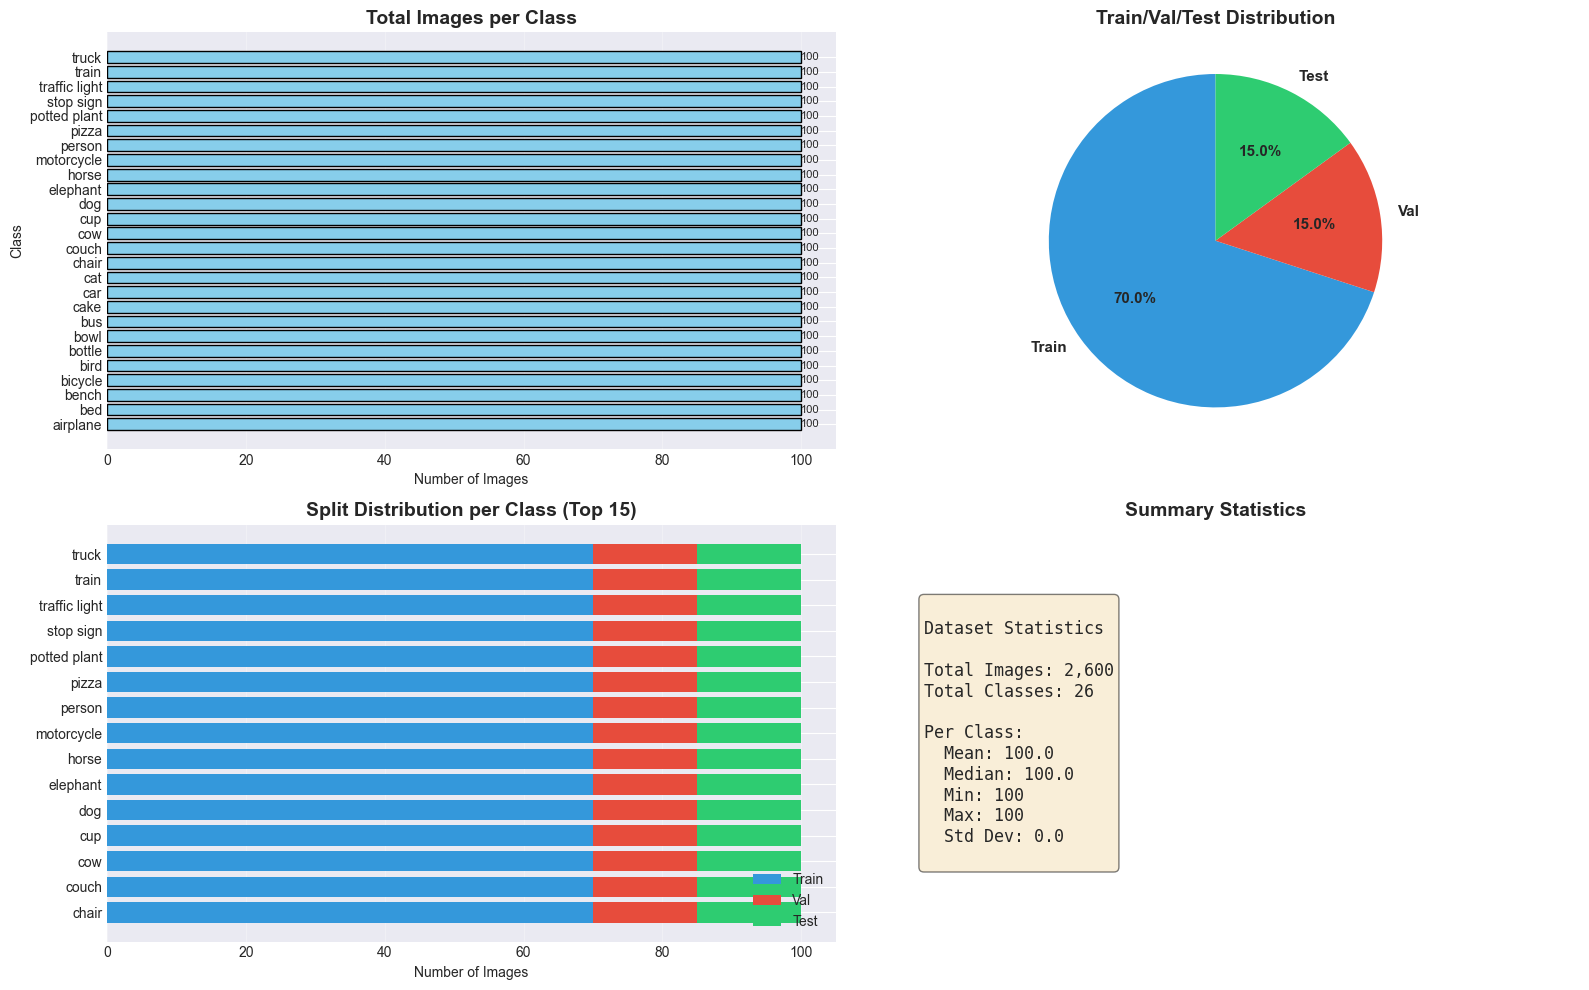


🖼️  IMAGE CHARACTERISTICS
📐 Analyzed 100 images:
   Width:  224±0px (min:224 max:224)
   Height: 224±0px (min:224 max:224)
   Aspect: 1.00±0.00
✅ Saved: eda_image_characteristics.png


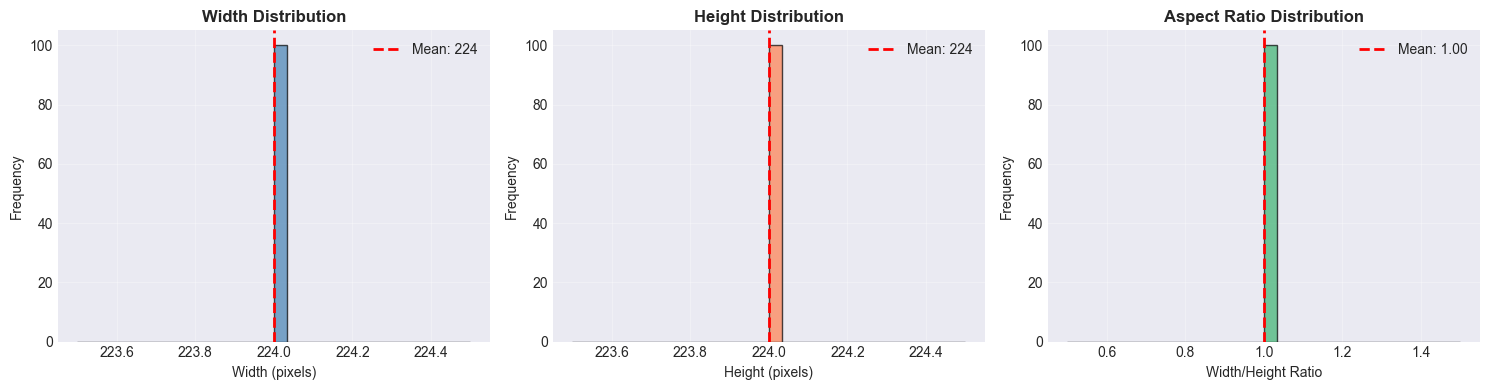


🎨 SAMPLE IMAGES
✅ Saved: eda_sample_images.png


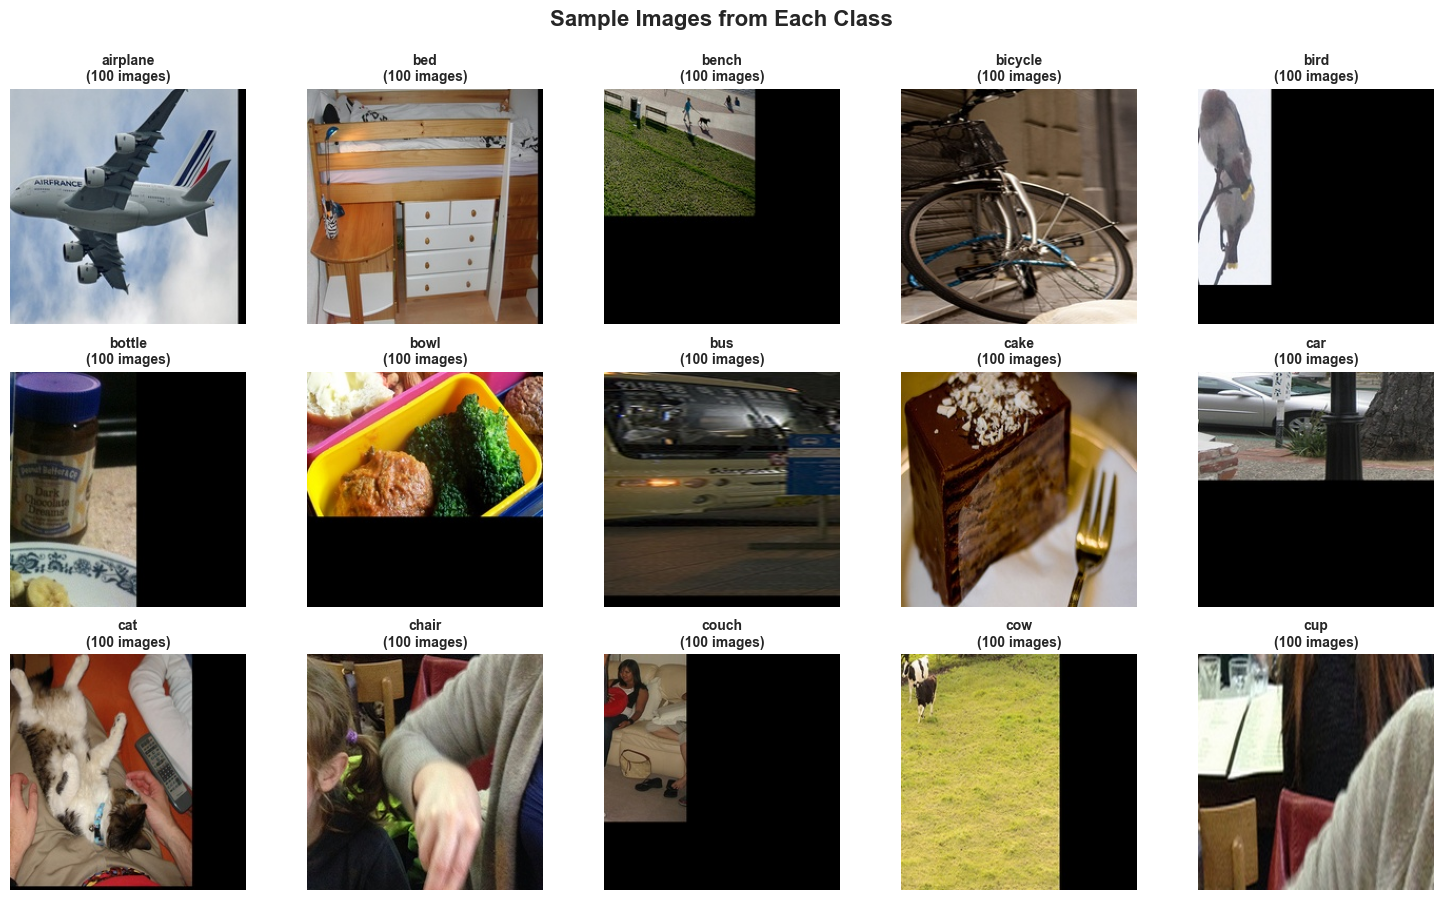


📋 ANALYSIS COMPLETE!
✅ Total images: 2,600
✅ Classes: 26
✅ Splits: Train=1,820, Val=390, Test=390
✅ Avg size: 224×224px

📊 Generated 3 visualization files:
   1. eda_class_distribution.png
   2. eda_image_characteristics.png
   3. eda_sample_images.png


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# CONFIGURATION - FLEXIBLE PATH DETECTION
# ============================================================================

# Try multiple possible locations
possible_paths = [
    r"C:\project\SmartVision AI Project\data\smartvision_dataset",
    "../data/smartvision_dataset",
    "smartvision_dataset",
    "./smartvision_dataset",
    "../smartvision_dataset"
]

BASE_DIR = None
for path in possible_paths:
    if os.path.exists(path):
        BASE_DIR = path
        print(f"✅ Found dataset at: {os.path.abspath(path)}")
        break

if BASE_DIR is None:
    print("❌ Dataset not found in any expected location!")
    print("\n🔍 Searched these locations:")
    for path in possible_paths:
        print(f"   ❌ {os.path.abspath(path)}")
    print("\n💡 Please update BASE_DIR manually or move your dataset")
    raise SystemExit("Dataset not found")

# Auto-detect if 'classification' subfolder exists
if os.path.exists(os.path.join(BASE_DIR, "classification")):
    CLASSIFICATION_DIR = os.path.join(BASE_DIR, "classification")
    print("📁 Structure: smartvision_dataset/classification/train/")
else:
    CLASSIFICATION_DIR = BASE_DIR
    print("📁 Structure: smartvision_dataset/train/")

# Auto-detect classes from train folder
def detect_classes(base_path):
    train_path = os.path.join(base_path, 'train')
    if os.path.exists(train_path):
        classes = [d for d in os.listdir(train_path) 
                   if os.path.isdir(os.path.join(train_path, d))]
        return sorted(classes)
    return []

CLASSES = detect_classes(CLASSIFICATION_DIR)

if not CLASSES:
    print("\n⚠️  No classes detected. Using default list...")
    CLASSES = ['person', 'car', 'dog', 'cat', 'bicycle']

print(f"🏷️  Detected {len(CLASSES)} classes: {', '.join(CLASSES[:5])}{'...' if len(CLASSES) > 5 else ''}")

# ============================================================================
# VALIDATION AND SETUP
# ============================================================================

def validate_and_setup():
    """Validate dataset structure and return metadata"""
    
    print("\n" + "="*80)
    print("📊 SMARTVISION AI - EXPLORATORY DATA ANALYSIS")
    print("="*80)
    
    # Check for any split directories
    found_splits = []
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(CLASSIFICATION_DIR, split)
        if os.path.exists(split_dir):
            found_splits.append(split)
    
    if not found_splits:
        print(f"\n❌ ERROR: No train/val/test folders found!")
        print(f"   Looked in: {CLASSIFICATION_DIR}")
        print(f"\n💡 Expected structure:")
        print(f"   {CLASSIFICATION_DIR}/train/car/image.jpg")
        return None
    
    print(f"✅ Found splits: {', '.join(found_splits)}")
    
    # Scan for images
    print(f"\n🔍 Scanning for images...")
    
    metadata = {
        'total_images': 0,
        'splits': {'train': 0, 'val': 0, 'test': 0},
        'classes': {}
    }
    
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(CLASSIFICATION_DIR, split)
        if not os.path.exists(split_dir):
            continue
        
        for class_name in CLASSES:
            class_dir = os.path.join(split_dir, class_name)
            if os.path.exists(class_dir):
                images = [f for f in os.listdir(class_dir) 
                         if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]
                count = len(images)
                
                if count > 0:
                    if class_name not in metadata['classes']:
                        metadata['classes'][class_name] = {
                            'train': 0, 'val': 0, 'test': 0, 'total': 0
                        }
                    
                    metadata['classes'][class_name][split] = count
                    metadata['classes'][class_name]['total'] += count
                    metadata['splits'][split] += count
                    metadata['total_images'] += count
    
    # Verify we found images
    if metadata['total_images'] == 0:
        print(f"\n❌ ERROR: No images found!")
        print(f"\n💡 Make sure your images are in:")
        print(f"   {CLASSIFICATION_DIR}/train/[class]/image.jpg")
        return None
    
    # Success!
    print(f"\n✅ Found {metadata['total_images']} total images")
    print(f"   Train: {metadata['splits']['train']}")
    print(f"   Val: {metadata['splits']['val']}")
    print(f"   Test: {metadata['splits']['test']}")
    print(f"   Classes: {len(metadata['classes'])}")
    
    return metadata

# ============================================================================
# RUN VALIDATION
# ============================================================================

metadata = validate_and_setup()

if metadata is None:
    print("\n" + "="*80)
    print("⛔ CANNOT PROCEED")
    print("="*80)
    raise SystemExit("Dataset validation failed")

# ============================================================================
# CREATE DATAFRAME
# ============================================================================

print("\n" + "="*80)
print("📈 CLASS DISTRIBUTION")
print("="*80)

class_data = []
for class_name, counts in metadata['classes'].items():
    class_data.append({
        'Class': class_name,
        'Train': counts['train'],
        'Val': counts['val'],
        'Test': counts['test'],
        'Total': counts['total']
    })

df_classes = pd.DataFrame(class_data)
df_classes = df_classes.sort_values('Total', ascending=False).reset_index(drop=True)

print(f"\n{df_classes.to_string(index=False)}")
print(f"\nTotal: {df_classes['Total'].sum()} images across {len(df_classes)} classes")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("📊 GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Total images per class
ax1 = axes[0, 0]
df_sorted = df_classes.sort_values('Total', ascending=True)
bars = ax1.barh(df_sorted['Class'], df_sorted['Total'], color='skyblue', edgecolor='black')
ax1.set_title('Total Images per Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Images')
ax1.set_ylabel('Class')
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontsize=8)

# Plot 2: Train/Val/Test Split
ax2 = axes[0, 1]
split_values = [metadata['splits']['train'], 
                metadata['splits']['val'], 
                metadata['splits']['test']]
split_labels = ['Train', 'Val', 'Test']

split_data = [(label, value) for label, value in zip(split_labels, split_values) if value > 0]

if split_data:
    labels, values = zip(*split_data)
    colors = ['#3498db', '#e74c3c', '#2ecc71'][:len(labels)]
    wedges, texts, autotexts = ax2.pie(
        values, 
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 11, 'weight': 'bold'}
    )
    ax2.set_title('Train/Val/Test Distribution', fontsize=14, fontweight='bold')

# Plot 3: Stacked bar chart
ax3 = axes[1, 0]
df_plot = df_classes.sort_values('Total', ascending=True).tail(15)  # Top 15
y_pos = range(len(df_plot))
ax3.barh(y_pos, df_plot['Train'], color='#3498db', label='Train')
ax3.barh(y_pos, df_plot['Val'], left=df_plot['Train'], color='#e74c3c', label='Val')
ax3.barh(y_pos, df_plot['Test'], left=df_plot['Train']+df_plot['Val'], 
         color='#2ecc71', label='Test')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(df_plot['Class'])
ax3.set_title('Split Distribution per Class (Top 15)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Images')
ax3.legend(loc='lower right')
ax3.grid(axis='x', alpha=0.3)

# Plot 4: Statistics
ax4 = axes[1, 1]
class_counts = df_classes['Total'].describe()
stats_text = f"""
Dataset Statistics

Total Images: {df_classes['Total'].sum():,}
Total Classes: {len(df_classes)}

Per Class:
  Mean: {class_counts['mean']:.1f}
  Median: {class_counts['50%']:.1f}
  Min: {int(class_counts['min'])}
  Max: {int(class_counts['max'])}
  Std Dev: {class_counts['std']:.1f}
"""
ax4.text(0.1, 0.5, stats_text, fontsize=12, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', 
         facecolor='wheat', alpha=0.5))
ax4.axis('off')
ax4.set_title('Summary Statistics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('eda_class_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: eda_class_distribution.png")
plt.show()

# ============================================================================
# IMAGE CHARACTERISTICS
# ============================================================================

print("\n" + "="*80)
print("🖼️  IMAGE CHARACTERISTICS")
print("="*80)

def analyze_images(n_samples_per_class=20):
    """Analyze image dimensions"""
    widths, heights, aspects = [], [], []
    
    sample_classes = df_classes['Class'].head(min(5, len(df_classes))).tolist()
    
    for class_name in sample_classes:
        class_dir = os.path.join(CLASSIFICATION_DIR, 'train', class_name)
        
        if not os.path.exists(class_dir):
            continue
        
        try:
            images = [f for f in os.listdir(class_dir) 
                     if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]
            images = images[:n_samples_per_class]
            
            for img_name in images:
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        w, h = img.size
                        widths.append(w)
                        heights.append(h)
                        if h > 0:
                            aspects.append(w/h)
                except:
                    continue
        except:
            continue
    
    return widths, heights, aspects

widths, heights, aspects = analyze_images()

if len(widths) > 0:
    print(f"📐 Analyzed {len(widths)} images:")
    print(f"   Width:  {np.mean(widths):.0f}±{np.std(widths):.0f}px (min:{np.min(widths)} max:{np.max(widths)})")
    print(f"   Height: {np.mean(heights):.0f}±{np.std(heights):.0f}px (min:{np.min(heights)} max:{np.max(heights)})")
    print(f"   Aspect: {np.mean(aspects):.2f}±{np.std(aspects):.2f}")
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].hist(widths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(widths):.0f}')
    axes[0].set_title('Width Distribution', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Width (pixels)')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].hist(heights, bins=30, color='coral', edgecolor='black', alpha=0.7)
    axes[1].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(heights):.0f}')
    axes[1].set_title('Height Distribution', fontweight='bold', fontsize=12)
    axes[1].set_xlabel('Height (pixels)')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    axes[2].hist(aspects, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
    axes[2].axvline(np.mean(aspects), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(aspects):.2f}')
    axes[2].set_title('Aspect Ratio Distribution', fontweight='bold', fontsize=12)
    axes[2].set_xlabel('Width/Height Ratio')
    axes[2].set_ylabel('Frequency')
    axes[2].legend()
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('eda_image_characteristics.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: eda_image_characteristics.png")
    plt.show()
else:
    print("⚠️  Could not analyze images")

# ============================================================================
# SAMPLE VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("🎨 SAMPLE IMAGES")
print("="*80)

n_display = min(15, len(df_classes))
n_cols = 5
n_rows = (n_display + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
if n_rows == 1:
    axes = [axes]
axes = [ax for row in axes for ax in (row if hasattr(row, '__iter__') else [row])]

for idx in range(len(axes)):
    if idx < len(df_classes):
        class_name = df_classes.iloc[idx]['Class']
        class_dir = os.path.join(CLASSIFICATION_DIR, 'train', class_name)
        
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) 
                     if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]
            
            if images:
                img_path = os.path.join(class_dir, images[0])
                try:
                    with Image.open(img_path) as img:
                        axes[idx].imshow(img)
                        total = df_classes.iloc[idx]['Total']
                        axes[idx].set_title(f"{class_name}\n({total} images)", 
                                           fontsize=10, fontweight='bold')
                except:
                    axes[idx].text(0.5, 0.5, 'Error', ha='center', va='center')
                    axes[idx].set_title(class_name, fontsize=10)
    
    axes[idx].axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('eda_sample_images.png', dpi=300, bbox_inches='tight')
print("✅ Saved: eda_sample_images.png")
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("📋 ANALYSIS COMPLETE!")
print("="*80)
print(f"✅ Total images: {metadata['total_images']:,}")
print(f"✅ Classes: {len(df_classes)}")
print(f"✅ Splits: Train={metadata['splits']['train']:,}, Val={metadata['splits']['val']:,}, Test={metadata['splits']['test']:,}")
if len(widths) > 0:
    print(f"✅ Avg size: {np.mean(widths):.0f}×{np.mean(heights):.0f}px")
print(f"\n📊 Generated 3 visualization files:")
print(f"   1. eda_class_distribution.png")
print(f"   2. eda_image_characteristics.png")
print(f"   3. eda_sample_images.png")
print("="*80)